In [1]:
#Add Matplotlib inline magic command
%matplotlib inline

In [2]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Load & read files
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [4]:
#Inspect the data - city
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [5]:
#Inspect the data - rides
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [6]:
#get all the empty rows = info()
#city_data_df.isnull().sum()

#get the count of the rows in each column = info()
#city_data_df.count()

#get the data type for each column = info()
#city_data_df.dtypes

In [7]:
#get the unique values from the city df, "type" column.
city_data_df["type"].unique()
#len(city_data_df["type"].unique())

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
#Get the number of data points from the Urban cities.
sum(city_data_df["type"] == "Urban")

66

In [9]:
#Get the number of data points from the Rural cities.
sum(city_data_df["type"] == "Rural")

18

In [10]:
#Get the number of data points from the Suburban cities.
sum(city_data_df["type"] == "Suburban")

36

In [11]:
#city_data_df["city"].unique()
len(city_data_df["city"].unique())

120

In [12]:
#ride_data_df["city"].unique()
len(city_data_df["city"].unique())

120

In [13]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#PSEUDOCODE:

#(1) The average fare for each type of city on the y-axis: mean()
#(2) The total number of rides for each type city on the x-axis: count()
#(3) Make the size of each bubble, correlate to the average number of drivers for each type of city: driver_count_average()

#(4) Create separate DataFrames for each type and then create Data Series for each step.


In [15]:
#Create the Urban DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [17]:
# Get the number of rides for urban cities PER CITY = USE GROUPBY().
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [19]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [21]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [22]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

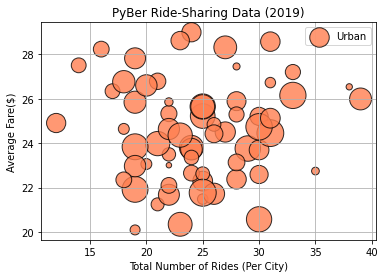

In [23]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare, s= 10* urban_driver_count, label='Urban', 
            alpha=0.8, color="coral", edgecolor= "black", linewidth = 1)

# Create labels for the x and y axes.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Create a title.
plt.title("PyBer Ride-Sharing Data (2019)")

# Add the legend.
plt.legend()

#Add the grid.
plt.grid(True)

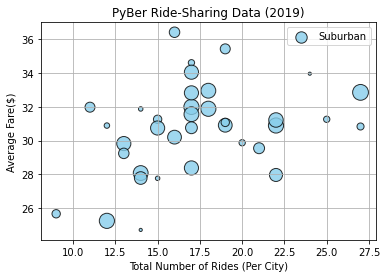

In [24]:
# Build the scatter plots for urban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare, s= 10* suburban_driver_count, label='Suburban', 
            alpha=0.8, color="skyblue", edgecolor= "k", linewidth = 1)

# Create labels for the x and y axes.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Create a title.
plt.title("PyBer Ride-Sharing Data (2019)")

# Add the legend.
plt.legend()

#Add the grid.
plt.grid(True)

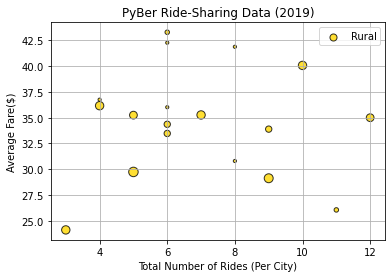

In [25]:
# Build the scatter plots for urban cities.
plt.scatter(rural_ride_count,
      rural_avg_fare, s= 10* rural_driver_count, label='Rural', 
            alpha=0.8, color="gold", edgecolor= "k", linewidth = 1)

# Create labels for the x and y axes.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Create a title.
plt.title("PyBer Ride-Sharing Data (2019)")

# Add the legend.
plt.legend()

#Add the grid.
plt.grid(True)

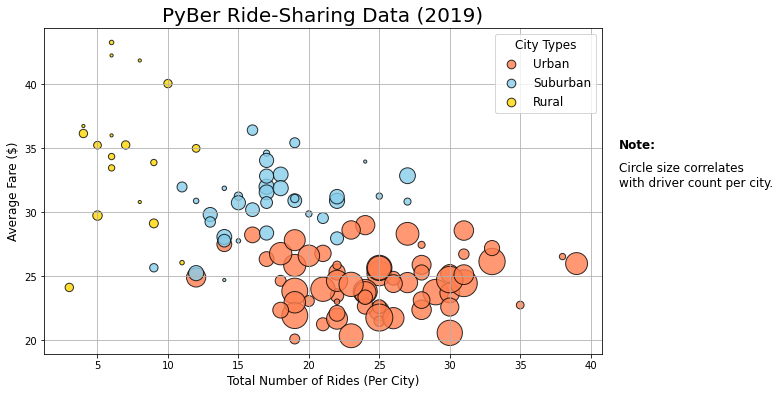

In [38]:
#Add the general figure size.
plt.subplots(figsize=(10, 6))

# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")


# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Incorporate a text label about circle size.
plt.text(42, 35, "Note:", fontsize="12", fontweight='bold')
plt.text(42, 32, "Circle size correlates \nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

# Show the plot
plt.show()